In [13]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (24, 18), 
        "axes.titlesize" : 18 
    }
)

Populating the interactive namespace from numpy and matplotlib


In [89]:
df = pd.read_csv('data/train.csv')

### Show data

In [76]:
# print(df.shape)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Show types and null's

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Map data to numerical format

In [96]:
gender_map = {'male':0, 'female':1}
df['Sex0'] = df['Sex'].map(gender_map)

### Show basic numerical data distribution

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex0
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05F7B450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0CC123F0>]], dtype=object)

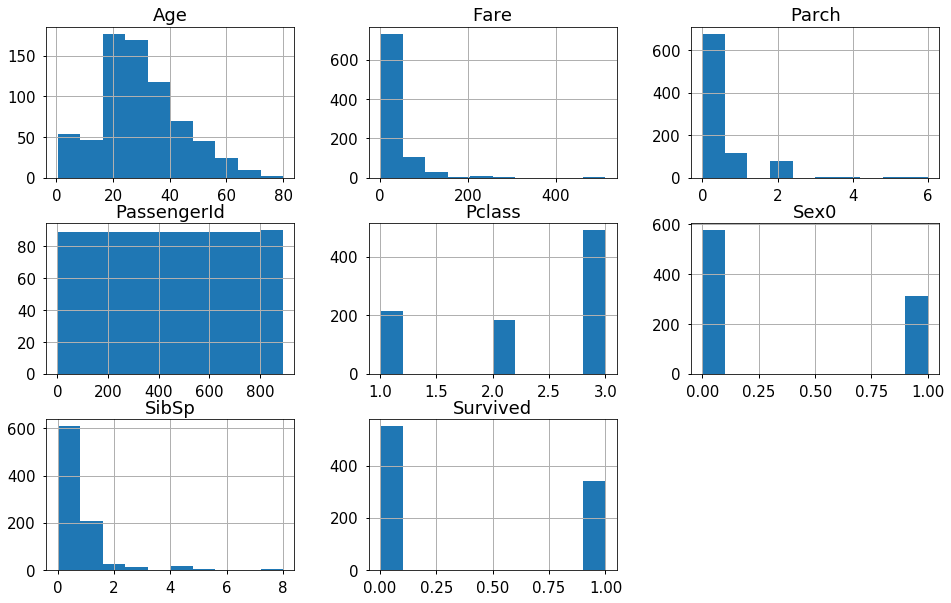

In [49]:
df.hist()

### Check correlation between Survived and numerical columns

In [53]:
df.groupby(['Survived'])[df.columns].agg([np.mean, np.std])

PassengerId             Survived         Pclass                  Age  \
                mean         std     mean  std      mean       std       mean   
Survived                                                                        
0         447.016393  260.640469        0  0.0  2.531876  0.735805  30.626179   
1         444.368421  252.358840        1  0.0  1.950292  0.863321  28.343690   

                        SibSp               Parch                 Fare  \
                std      mean       std      mean       std       mean   
Survived                                                                 
0         14.172110  0.553734  1.288399  0.329690  0.823166  22.117887   
1         14.950952  0.473684  0.708688  0.464912  0.771712  48.395408   

                         Sex0            
                std      mean       std  
Survived                                 
0         31.388207  0.147541  0.354968  
1         66.596998  0.681287  0.466660

In [73]:
#cols = ['Survived', 'Pclass', 'Sex0', 'Fare'] # , 'Age', 'SibSp', 'Parch'
#sns_plot = sns.pairplot(df[cols])
#sns_plot.savefig('pairplot.png')

In [90]:
model_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex0']

In [75]:
df.groupby(df.Survived)[model_columns].agg([np.mean, np.std])

Survived         Pclass                  Age                SibSp  \
             mean  std      mean       std       mean        std      mean   
Survived                                                                     
0               0  0.0  2.531876  0.735805  30.626179  14.172110  0.553734   
1               1  0.0  1.950292  0.863321  28.343690  14.950952  0.473684   

                       Parch                 Fare                 Sex0  \
               std      mean       std       mean        std      mean   
Survived                                                                 
0         1.288399  0.329690  0.823166  22.117887  31.388207  0.147541   
1         0.708688  0.464912  0.771712  48.395408  66.596998  0.681287   

                    
               std  
Survived            
0         0.354968  
1         0.466660

In [87]:
df.groupby(df.Survived)['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [86]:
df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [102]:
df.groupby(['Pclass', 'Survived'])[model_columns].agg([np.mean, np.std])

Survived      Pclass             Age                SibSp  \
                    mean  std   mean  std       mean        std      mean   
Pclass Survived                                                             
1      0               0  0.0      1  0.0  43.695312  15.284243  0.287500   
       1               1  0.0      1  0.0  35.368197  13.760017  0.492647   
2      0               0  0.0      2  0.0  33.544444  12.151581  0.319588   
       1               1  0.0      2  0.0  25.901566  14.837787  0.494253   
3      0               0  0.0      3  0.0  26.555556  12.334882  0.672043   
       1               1  0.0      3  0.0  20.646118  11.995047  0.436975   

                              Parch                 Fare                 Sex0  \
                      std      mean       std       mean        std      mean   
Pclass Survived                                                                 
1      0         0.555610  0.300000  0.700813  64.684008  60.662089  0.037500   
       1         0.632412  0.389706  0.690387  95.608029  85.286820  0.669118   
2      0         0.550500  0.144330  0.432765  19.412328  15.307175  0.061856   
       1         0.644720  0.643678  0.820904  22.055700  10.853502  0.804598   
3      0         1.504700  0.384409  0.914144  13.669364  12.118338  0.193548   
       1         0.829934  0.420168  0.807757  13.694887  10.692993  0.605042   

                           
                      std  
Pclass Survived            
1      0         0.191182  
       1         0.472270  
2      0         0.242145  
       1         0.398809  
3      0         0.395611  
       1         0.490909

### Cross Tab

In [106]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [108]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [130]:
df[model_columns].count()

Survived    891
Pclass      891
Age         714
SibSp       891
Parch       891
Fare        891
Sex0        891
dtype: int64

In [140]:
df2 = df[model_columns].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Sex0        714 non-null int64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = {
        "Nearest Neighbors":    KNeighborsClassifier(3),
        "Linear SVM":           SVC(kernel="linear", C=0.025),
        "RBF SVM":              SVC(gamma=2, C=1),
        # "Gaussian Process":     GaussianProcessClassifier(1.0 * RBF(1.0)),
        "Decision Tree":        DecisionTreeClassifier(max_depth=5),
        "Random Forest":        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        "Neural Net":           MLPClassifier(alpha=1),
        "AdaBoost":             AdaBoostClassifier(),
        "Naive Bayes":          GaussianNB(),
        "QDA":                  QuadraticDiscriminantAnalysis()
    }

In [144]:
X_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex0']
df_fit, df_test = df2.loc[:500, :], df2.loc[500:, :]
pd_X = df_fit.loc[:, X_columns]
pd_Y = df_fit.Survived
pd_test_X = df_test.loc[:, X_columns]
pd_test_Y = df_test.Survived

In [145]:
X = np.asarray(pd_X)
Y = np.asarray(pd_Y)
X_test = np.asarray(pd_test_X)
Y_test = np.asarray(pd_test_Y)

for c in classifiers:
    display(c)
    clf = classifiers[c]
    # print(X)
    clf.fit(X, Y)
    print('(Self score : {:.2f}%)'.format(clf.score(X, Y)*100))
    print('===> Test score : == {:.2f}% =='.format(clf.score(X_test, Y_test)*100))

'Nearest Neighbors'

(Self score : 81.70%)
===> Test score : == 67.72% ==


'Linear SVM'

(Self score : 79.45%)
===> Test score : == 77.22% ==


'RBF SVM'

(Self score : 97.49%)
===> Test score : == 56.33% ==


'Decision Tree'

(Self score : 85.46%)
===> Test score : == 79.43% ==


'Random Forest'

(Self score : 84.21%)
===> Test score : == 80.06% ==


'Neural Net'

(Self score : 67.92%)
===> Test score : == 75.32% ==


'AdaBoost'

(Self score : 83.96%)
===> Test score : == 78.80% ==


'Naive Bayes'

(Self score : 78.70%)
===> Test score : == 78.16% ==


'QDA'

(Self score : 79.45%)
===> Test score : == 80.06% ==
